# Perceptron Learning Algorithm

the Perceptron Learning Algorithm (PLA) is the simplest and yet very powerful algorithm for learning a linear classifier. It's structure is based on one neuron. 

## Theoratical Aspects

The idea behind the algorithm relies on two important concepts:
- input
- weight input

Every input has its weight based on its importance in the classification. Given $N$ inputs, it's possible to create a hypotesis function $h(X_i)$ that will approximate the oracle $y_i$. The PLA output is binary, in other words the perceptron is able to classify if one result is higher or lower that a certain threshold $T$.

$$
h(X_i) = w_i \cdot X_i^1 + w_i \cdot X_i^2 + \ldots + w_i \cdot X_i^N \\
h(X_i) = \sum_{j=1}^{N} w_i \cdot X_i^j - T \leq 0 \implies h(X_i) = \textrm{sign}\left(\sum_{j=1}^{N} w_i \cdot X_i^j - T\right)
$$
englobing the threshold $T$ into an initial input $x_0$ called bias, the equation can be rewritten as:
$$
h(X_i) = \textrm{sign}\left(\sum_{j=0}^{N} w_i \cdot X_i^j\right) = \textrm{sign}\left(w^T \cdot X_i\right) = \textrm{sign}\left(X_i w \right)
$$

### Learning rule

The learning rule is based on the error between the oracle and the hypotesis function. The error is calculated as the difference between the oracle and the hypotesis function. The weight is updated based on the error and the learning rate $\eta$.

Here is a small example of the learning rule:

- $w$: $d$-dimentional vector
- $X$: $d$-dimentional space
Let's suppose $h(X_i) =\textrm{sign}[w^T \cdot X_i]$ = -1 != y_1 = -1$, which indicates that the vectors $X_i$ and $w$ are not in the same direction.

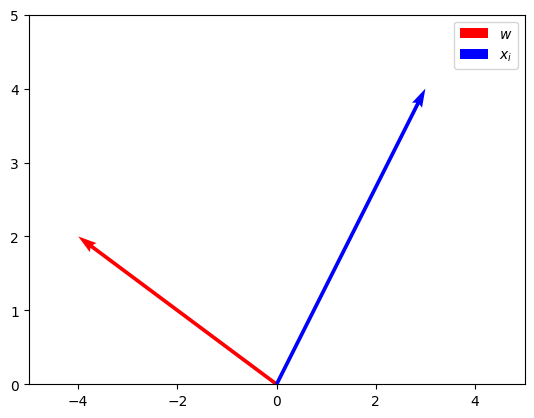

In [1]:
import numpy as np
import matplotlib.pyplot as plt

w = np.array([-4, 2])
x_i = np.array([3, 4])

_, ax = plt.subplots()
ax.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(0, 0, x_i[0], x_i[1], angles='xy', scale_units='xy', scale=1, color='b')

plt.xlim(-5, 5)
plt.ylim(0, 5)
plt.legend(['$w$', '$x_i$'])
plt.show()

In order to align the vectors a rotation is needed:

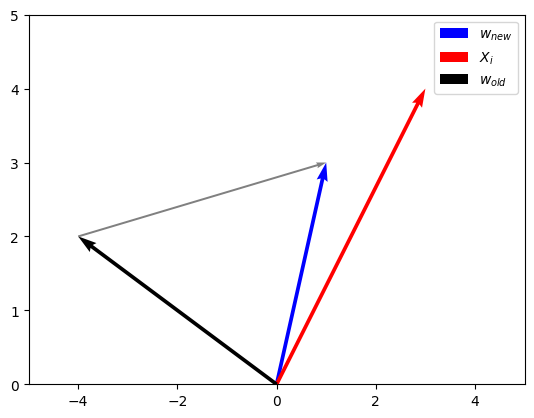

In [3]:
# print
w_rotated = np.array([5,1])
w_new = np.array([w[0] + w_rotated[0], w[1] + w_rotated[1]])

_, ax = plt.subplots()

ax.quiver(0, 0, *w_new, angles='xy', scale_units='xy', scale=1, color='blue', label='$w_{new}$') 
ax.quiver(0, 0, *x_i, angles='xy', scale_units='xy', scale=1, color='red', label='$X_i$') 
ax.quiver(0, 0, *w, angles='xy', scale_units='xy', scale=1, color='black', label='$w_{old}$')    
ax.quiver(w[0], w[1], *w_rotated, angles='xy', scale_units='xy', scale=1, color='gray', width = 4e-3) 

ax.set_xlim(-5, 5)
ax.set_ylim(0, 5)
ax.legend()

### Update rule
The update rule is based on the error between the oracle and the hypotesis function. The error is calculated as the difference between the oracle and the hypotesis function. The weight is updated based on the error and the learning rate $\eta$.

$$
w_{\text{new}} = w_{\text{old}} + \eta(X_i y_i) 
$$
The learning rate $\eta$ is a small positive number in the range $[10^{-3}, 10^{-5}]$ that controls the step size of the algorithm. The learning rate is a hyperparameter that must be tuned in order to achieve the best results.

# PLA Implementation

## Pseudocode

The PLA algorithm is a simple algorithm that can be implemented in a few lines of code. The algorithm is based on the following steps:

1. Initialize the weights $w$ with zeros
2. Iterate over the dataset until the stopping criterion is met
3. For each sample $X_i$ in the dataset:
    1. Calculate the output of the perceptron $h(X_i) = \text{sign}(w^T \cdot X_i)$
    2. Update the weights $w = w + \eta(X_i y_i)$ if the output is different from the oracle $y_i$
    3. Repeat the process until the stopping criterion is met
 4. Return the weights $w$

## Implementation
### Initial Setup
Generate some pseudo-random numbers, called this way because given a seed the generation is deterministic. The number $N$ of samples per class if defined as 1000. (Can be seen as the $N$ in the *Hoeffding's inequality*)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)
N = 1000

The `normal` function is used to generate the numbers in a Gaussian distribution, it takes the following parameters:
- `loc`: the mean of the distribution
- `scale`: the standard deviation of the distribution
These two parameters make the curve very dense across the value 0.5. This teqhnique is used to generate 4 sets: the first and second features for classes 1 and 2.

The weights vector $w = [w_0, \dots , w_d]$ is generated through the `uniform` function, which generates random numbers in a uniform distribution.

[1. 1. 1.]


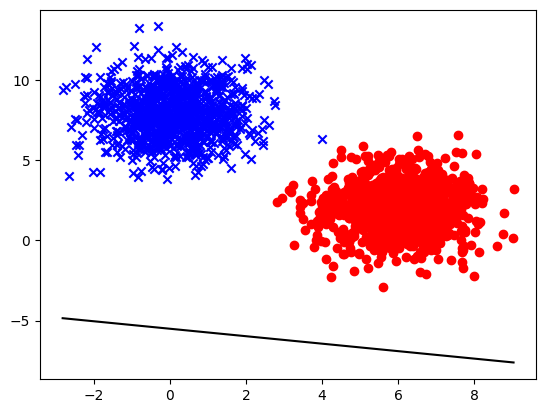

In [4]:
X11 = np.random.normal(loc=6, scale=1, size=N)
X12 = np.random.normal(loc=2, scale=1.5, size=N)
y1 = np.ones(N)

X21 = np.random.normal(loc=0, scale=1, size=N)
X22 = np.random.normal(loc=8, scale=1.5, size=N)
y2 = -np.ones(N)

plt.scatter(X11, X12, c='r', marker='o', label='class 1')
plt.scatter(X21, X22, c='b', marker='x', label='class -1')

w = np.random.uniform(low=1, size=3)
print(w)

plt.plot(
  [np.min(X21), np.max(X11)],
  [np.min(X22)* (-w[1]/w[2]) - w[0]/w[2], np.max(X12)* (-w[1]/w[2]) - w[0]/w[2]],
  color='black'
)

Before starting the training we need to define:
- A vector $X_0$ with the bias term
- $X_1$ and $X_2$ with the features of the classes 1 and 2
- $X$ with the concatenation of $X_0$, $X_1$ and $X_2$: each row is a sample and each column is a feature
- $Y$ with the labels of the classes 1 and 2

y shape: (2000,)


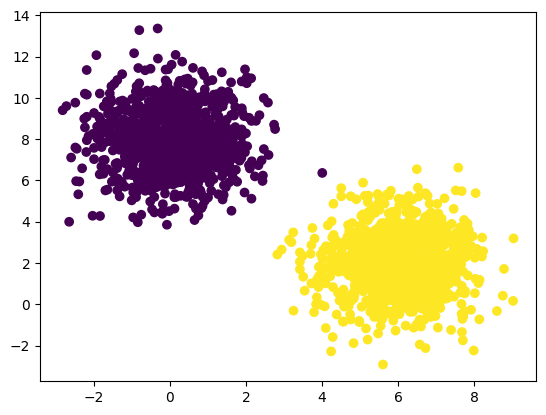

In [6]:
X0 = np.ones(2*N)
X1 = np.concatenate((X11, X21))
X2 = np.concatenate((X12, X22))
X = np.stack([X0, X1, X2], axis=1)
y = np.concatenate((y1, y2))

plt.scatter(X[:,1], X[:,2], c = y)
print(f"y shape: {y.shape}")

### Training
The training through the PLA algorithm requires the following parameters:
- `current_epoch`: we define as 0
- `max_epoch`: the maximum number of epochs, we define as 100
- `learning_rate` or `eta`: the learning rate, we define as $1*10^{-3}$

In [7]:
max_epochs = 100
current_epoch = 0
eta = 1e-3

During each epoch the algorithm checks if the output of the perceptron is different from the oracle. If the output is different the weights are updated. The algorithm stops when the output is equal to the oracle or the maximum number of epochs is reached.

[ 0.779       0.8015238  -0.63444848]


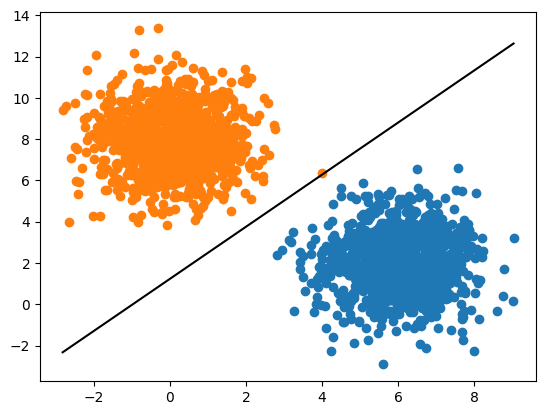

In [22]:
while current_epoch < max_epochs:
  for i in range(y.size):
    Xi = X[i,:]
    yi = y[i]
    if np.dot(w, Xi)*yi < 0:
      w = w + eta * Xi * yi
  current_epoch += 1
  
print(w)
  
plt.scatter(X11, X12)
plt.scatter(X21, X22)

slope = -w[1]/w[2]
intercept = -w[0]/w[2]

plt.plot(
  [np.min(X1), np.max(X1)],
  [np.min(X1)*slope + intercept, np.max(X1)*slope + intercept],
  color='black'
)

plt.show()